# Week 03

Content:

1. SVD 
2. TF-IDF
3. argmax
4. monotone function
5. Latent Semantic Analysis

## 1. SVD

Recall from the lectures, that we can decompose any matrix using an SVD: 
$$\textbf{A} = \textbf{U} \, \Sigma \, \textbf{V}^T$$


### Question
Our goal here is to calculate the SVD of $\textbf{A}^{-1}$

1. Show that $\textbf{U}^{-1} = \textbf{U}^T$
2. Does the same hold for $\textbf V$?
3. What is the inverse matrix of $\Sigma$ provided that the diagonal entries $\sigma_i$ are not zero and $\Sigma$ is a square matrix?
4. Combine the results to derive the SVD of $\textbf{A}^{-1}$

## 2.  TFIDF

Let $X$ be tf-idf matrix.

1. Check that the the result in $(i,j)$ of $X^T X$ is equal to the dot-product of document $d_i \cdot d_j$
2. Check that $X^T X$ is symmetric

# 3. argmax
let $f(x1, x2) = x_1x_2 - x_1^2 - 2x_2^2$ for $x_i \in [-5, 5]$
1. plot the function to verify visually, that there is a maximum 
2. what is $\text{argmax}_{x_1,x_2}f(x_1, x_2)$
3. in general, what is the value of $g(\text{argmax}_x g(x))$ for a real-valued $g$?

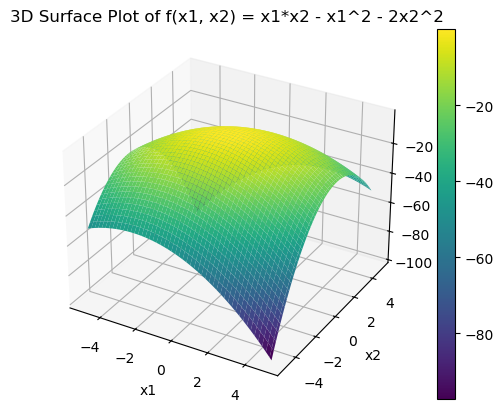

In [ ]:
# create a plot like this for 1

## 4. Monotone function
1. let m be a monotone increasing function, i.e. $m(x) \le m(y)$ for all $x \le y$ and $f$ be an arbitrary function. Is it true that $\text{argmax}_x f(x) = \text{argmax}_x m(f(x))$?
2. explain, how you can use the result from 4. to derive the formula in the lecture, i.e. $$c_{\text{NB}} = \arg\max_{c \in C} \left( \log \mathbb{P}[c] + \sum_{w_i \in V} \log \mathbb{P}[w_i|c] \right)$$


## TF-IDF and Latent Semantic Analysis

In [4]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from collections import Counter
import matplotlib.pyplot as plt

Importing the data:

In [5]:
data_folder = Path("WikiQACorpus/WikiQACorpus/")

train = pd.read_csv(data_folder/"WikiQA-train.txt", header=None, sep = r'\t', engine='python')

column_names = ["q", "a", "is_answer"]
train.columns = column_names

train.sort_values("q", inplace=True)
train

,q,a,is_answer
987,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"Currently , Nevada is the only state to allow brothel prostitution , the terms of which are stipulated in the Nevada Revised Statutes .",0
991,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"Street prostitution , `` pandering , '' and living off of the proceeds of a prostitute remain illegal under Nevada law , as elsewhere in the country .",0
984,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"The regulation of prostitution in the United States is not among the enumerated powers of the federal government ; Under the Tenth Amendment to the United States Constitution , it is therefore exclusively the domain of the states to permit , prohibit , or otherwise regulate commercial sex , except insofar as Congress may regulate it as part of interstate commerce with laws like the Mann Act .",0
990,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"The other counties theoretically allow brothel prostitution , but some of these counties currently have no active brothels .",0
989,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"All forms of prostitution are illegal in Clark County ( which contains the Las Vegas–Paradise metropolitan area ) , Washoe County ( which contains Reno ) , Carson City , Douglas County , and Lincoln County .",0
...,...,...,...
7295,who wrote white christmas,"According to the Guinness Book of World Records , the version sung by Bing Crosby is the best-selling single of all time , with estimated sales in excess of 50 million copies worldwide .",0
7296,who wrote white christmas,Accounts vary as to when and where Berlin wrote the song .,0
7297,who wrote white christmas,"One story is that he wrote it in 1940 , in warm La Quinta , California , while staying at the La Quinta Hotel , a frequent Hollywood retreat also favored by writer-producer Frank Capra , although the Arizona Biltmore also claims the song was written there .",0
7298,who wrote white christmas,"He often stayed up all night writing — he told his secretary , `` Grab your pen and take down this song .",0


Add a counter within each group of questions (group size):

In [6]:
train['q_count'] = train.groupby('q')['q'].transform('count')
train.query('q_count > 1')

,q,a,is_answer,q_count
987,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"Currently , Nevada is the only state to allow brothel prostitution , the terms of which are stipulated in the Nevada Revised Statutes .",0,9
991,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"Street prostitution , `` pandering , '' and living off of the proceeds of a prostitute remain illegal under Nevada law , as elsewhere in the country .",0,9
984,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"The regulation of prostitution in the United States is not among the enumerated powers of the federal government ; Under the Tenth Amendment to the United States Constitution , it is therefore exclusively the domain of the states to permit , prohibit , or otherwise regulate commercial sex , except insofar as Congress may regulate it as part of interstate commerce with laws like the Mann Act .",0,9
990,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"The other counties theoretically allow brothel prostitution , but some of these counties currently have no active brothels .",0,9
989,HOW MANY BROTHELS WERE THERE IN THE UNITED STATES IN 1840 'S,"All forms of prostitution are illegal in Clark County ( which contains the Las Vegas–Paradise metropolitan area ) , Washoe County ( which contains Reno ) , Carson City , Douglas County , and Lincoln County .",0,9
...,...,...,...,...
7295,who wrote white christmas,"According to the Guinness Book of World Records , the version sung by Bing Crosby is the best-selling single of all time , with estimated sales in excess of 50 million copies worldwide .",0,7
7296,who wrote white christmas,Accounts vary as to when and where Berlin wrote the song .,0,7
7297,who wrote white christmas,"One story is that he wrote it in 1940 , in warm La Quinta , California , while staying at the La Quinta Hotel , a frequent Hollywood retreat also favored by writer-producer Frank Capra , although the Arizona Biltmore also claims the song was written there .",0,7
7298,who wrote white christmas,"He often stayed up all night writing — he told his secretary , `` Grab your pen and take down this song .",0,7


Exclude:
 - Questions with too less answers (less than *min_q*)
 - Questions that have no true answer

In [ ]:
def filter_data(df, min_q = 5):
    df['q_count'] = df.groupby('q')['q'].transform('count')
    df['has_correct_answer'] = df.groupby('q')['is_answer'].transform('max')
    return df.query("q_count >= @min_q").query("has_correct_answer == 1")

print(f"before: {train.shape}")
train = filter_data(train)
print(f"after: {train.shape}")

before: (20360, 4)
after: (8108, 5)


In [8]:
train.describe()

,is_answer,q_count,has_correct_answer
count,8108.000000,8108.000000,8108.0
mean,0.101505,14.704243,1.0
std,0.302014,6.458040,0.0
min,0.000000,5.000000,1.0
25%,0.000000,10.000000,1.0
50%,0.000000,14.000000,1.0
75%,0.000000,19.000000,1.0
max,1.000000,30.000000,1.0


Looks okay.

Remark: this data might be subotpimal for LSA, since the answers are very short and the questions are very similar.

Data preprocessing:
 - your choice. Candidate operations include stopword removal, lowercasing, remove answers than have only one or two words after stopword removal, etc.

In [ ]:
# your turn


Check out [gensim](https://radimrehurek.com/gensim/models/lsimodel.html) for doing LSA and full tf-idf:
 - do a full tf-idf and compare with LSA using different values for the low-rank approximation (*num_topics* in *LsiModel*)
 - as a measure of success: when retrieving the top-k best matching documents for a question, check if you get the correct answer within your top-k return (see function below)

In [14]:
import gensim
from gensim import corpora, similarities
from gensim.models import LsiModel, TfidfModel